<a href="https://colab.research.google.com/github/afrahhassan/afrahhassan/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Task
This report will analyse the methodology used to complete assignment 2 of the course Machine Learning (COSC2673/2793). The objective of the assignment is to develop a machine-learning system that can classify traffic sign images.

The project is divided into two tasks:


*   Classify images according to the shape of the given image.
*    Classify images according to type.



## Approach
Our goal is to be able to identify the best possible machine-learning algorithm to generate a model that can reliably and consistently predict whether the type of traffic sign is based on image recognition.

# **Reading Data**

In [1]:
from google.colab import drive
import os
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2

In [2]:
!cp -r "/content/drive/MyDrive/Assignment2" .

cp: cannot stat '/content/drive/MyDrive/Assignment2': No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Assignment2/trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# **1. Data Preparation**
## **1.1 Image Visualization**

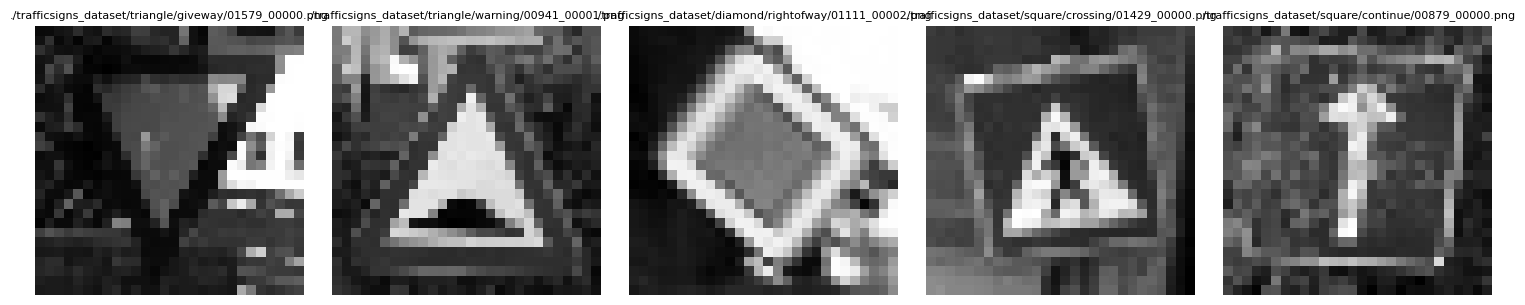

In [5]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the ZIP file and extraction directory
zip_path = '/content/drive/MyDrive/Assignment2/trafficsigns_dataset.zip'
extraction_path = './trafficsigns_dataset'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Function to display images
def plot_images(images, titles, rows=1, cols=5, figsize=(15, 3)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(titles[i], fontsize=8)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Function to collect images from multiple directories
def collect_images(directory, extension, num_images=5, cols=5):
    images = []
    titles = []
    # Walk through each folder and subfolder
    for root, dirs, files in os.walk(directory):
        file_list = [os.path.join(root, file) for file in files if file.endswith(extension)]
        if file_list:
            selected_files = file_list[:num_images]  # Take up to num_images from each folder
            images.extend([mpimg.imread(img) for img in selected_files])
            titles.extend(selected_files)
        if len(images) >= cols:  # Limit the total number of images to display
            break
    return images, titles

# Collect and display images
image_extensions = ('.jpeg', '.jpg', '.png')
images, titles = collect_images(extraction_path, image_extensions, num_images=1, cols=5)  # Adjust num_images to pick from each folder
plot_images(images, titles)




**Observations:**
- The traffic sign images exhibit a wide variety of shapes.
- Some signs have distinctive shapes (e.g., triangles, circles, octagons), while others have more complex shapes.
- The images also vary in terms of background complexity, with some signs having simple backgrounds and others having more cluttered backgrounds.
- These observations suggest that a machine-learning algorithm will need to be able to handle a diverse range of image characteristics in order to accurately classify the traffic signs.

# **1.2 Data spliting:  Train, Val and Test**


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Reading the CSV files
type_df = pd.read_csv('/content/drive/My Drive/Assignment2/type.csv')
shape_df = pd.read_csv('/content/drive/My Drive/Assignment2/shape.csv')

# Initialization of lists to hold split data
X_shape_train, X_shape_val, X_shape_test = [], [], []
y_shape_train, y_shape_val, y_shape_test = [], [], []
X_type_train, X_type_val, X_type_test = [], [], []
y_type_train, y_type_val, y_type_test = [], [], []

# Splitting the data for shapes
shape_groups = shape_df.groupby('encoded_class')
for label, group in shape_groups:
    X_train, X_temp, y_train, y_temp = train_test_split(
        group[['image_path', 'class', 'encoded_class']],
        group['encoded_class'], test_size=0.2, stratify=group['encoded_class'])
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.2, stratify=y_temp)

    X_shape_train.extend(X_train.values)
    X_shape_val.extend(X_val.values)
    X_shape_test.extend(X_test.values)
    y_shape_train.extend(y_train)
    y_shape_val.extend(y_val)
    y_shape_test.extend(y_test)

# Splitting the data for types
type_groups = type_df.groupby('encoded_class')
for label, group in type_groups:
    X_train, X_temp, y_train, y_temp = train_test_split(
        group[['image_path', 'class', 'encoded_class']],
        group['encoded_class'], test_size=0.2, stratify=group['encoded_class'])
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.2, stratify=y_temp)

    X_type_train.extend(X_train.values)
    X_type_val.extend(X_val.values)
    X_type_test.extend(X_test.values)
    y_type_train.extend(y_train)
    y_type_val.extend(y_val)
    y_type_test.extend(y_test)

# Converting lists to DataFrames and arrays
X_shape_train = pd.DataFrame(X_shape_train, columns=['image_path', 'class', 'encoded_class'])
X_shape_val = pd.DataFrame(X_shape_val, columns=['image_path', 'class', 'encoded_class'])
X_shape_test = pd.DataFrame(X_shape_test, columns=['image_path', 'class', 'encoded_class'])

y_shape_train = np.array(y_shape_train)
y_shape_val = np.array(y_shape_val)
y_shape_test = np.array(y_shape_test)

X_type_train = pd.DataFrame(X_type_train, columns=['image_path', 'class', 'encoded_class'])
X_type_val = pd.DataFrame(X_type_val, columns=['image_path', 'class', 'encoded_class'])
X_type_test = pd.DataFrame(X_type_test, columns=['image_path', 'class', 'encoded_class'])

y_type_train = np.array(y_type_train)
y_type_val = np.array(y_type_val)
y_type_test = np.array(y_type_test)

# Print the shapes of the data sets to confirm the split
print("Shape of X_shape_train:", X_shape_train.shape)
print("Shape of X_shape_val:", X_shape_val.shape)
print("Shape of X_shape_test:", X_shape_test.shape)
print("Shape of y_shape_train:", y_shape_train.shape)
print("Shape of y_shape_val:", y_shape_val.shape)
print("Shape of y_shape_test:", y_shape_test.shape)
print("\nShape of X_type_train:", X_type_train.shape)
print("Shape of X_type_val:", X_type_val.shape)
print("Shape of X_type_test:", X_type_test.shape)
print("Shape of y_type_train:", y_type_train.shape)
print("Shape of y_type_val:", y_type_val.shape)
print("Shape of y_type_test:", y_type_test.shape)


Shape of X_shape_train: (5916, 3)
Shape of X_shape_val: (1183, 3)
Shape of X_shape_test: (299, 3)
Shape of y_shape_train: (5916,)
Shape of y_shape_val: (1183,)
Shape of y_shape_test: (299,)

Shape of X_type_train: (5913, 3)
Shape of X_type_val: (1183, 3)
Shape of X_type_test: (302, 3)
Shape of y_type_train: (5913,)
Shape of y_type_val: (1183,)
Shape of y_type_test: (302,)


## **1.3 Create files with path**
### **1.3.1 create shape csv file**

In [45]:

root_dir = '/content/trafficsigns_dataset'

output_shape = '/content/drive/My Drive/Assignment2/shape.csv'

class_mapping = {}

with open(output_shape, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'class', 'encoded_class'])

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file)
                class_name = os.path.basename(os.path.dirname(root))
                if class_name not in class_mapping:
                    class_mapping[class_name] = len(class_mapping)
                image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image, (28, 28))
                resized_image = np.expand_dims(resized_image, axis=-1)

                writer.writerow([full_path, class_name, class_mapping[class_name]])

print("CSV file has been created successfully.")

CSV file has been created successfully.


In [52]:
shape_df = pd.read_csv(output_shape)
shape_df.head(5)

,image_path,class,encoded_class
0,/content/trafficsigns_dataset/triangle/giveway...,triangle,0
1,/content/trafficsigns_dataset/triangle/giveway...,triangle,0
2,/content/trafficsigns_dataset/triangle/giveway...,triangle,0
3,/content/trafficsigns_dataset/triangle/giveway...,triangle,0
4,/content/trafficsigns_dataset/triangle/giveway...,triangle,0


### **1.3.2 create type csv file**

In [53]:
output_type = '/content/drive/My Drive/Assignment2/type.csv'


class_mapping = {}

with open(output_type , mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'class', 'encoded_class'])

    for root, dirs, files in os.walk(root_dir):
        for file_name in files:
            if file_name.endswith(('.png', '.jpg', '.jpeg')):
                full_path = os.path.join(root, file_name)
                class_name = os.path.basename(root)
                if class_name not in class_mapping:
                    class_mapping[class_name] = len(class_mapping)
                image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image, (28, 28))
                resized_image = np.expand_dims(resized_image, axis=-1)

                writer.writerow([full_path, class_name, class_mapping[class_name]])

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [54]:
type_df = pd.read_csv(output_type)
type_df.head(5)

,image_path,class,encoded_class
0,/content/trafficsigns_dataset/triangle/giveway...,giveway,0
1,/content/trafficsigns_dataset/triangle/giveway...,giveway,0
2,/content/trafficsigns_dataset/triangle/giveway...,giveway,0
3,/content/trafficsigns_dataset/triangle/giveway...,giveway,0
4,/content/trafficsigns_dataset/triangle/giveway...,giveway,0


In [57]:
print("Unique shapes:", X_shape_train['class'].unique())
print("numbers of shape:", len(X_shape_train['class'].unique()))

Unique shapes: ['triangle' 'diamond' 'square' 'hex' 'round']
numbers of shape: 5


In [58]:
print("Unique shapes:", X_type_train['class'].unique())
print("numbers of shape:", len(X_type_train['class'].unique()))

Unique shapes: ['giveway' 'warning' 'rightofway' 'crossing' 'continue' 'parking'
 'laneend' 'stop' 'roundabout' 'limitedtraffic' 'noentry' 'bicycle'
 'trafficdirective' 'speed' 'noparking' 'traveldirection']
numbers of shape: 16


## **1.4 Data Distribution**
### **1.4.1 Distribution of images per type class**

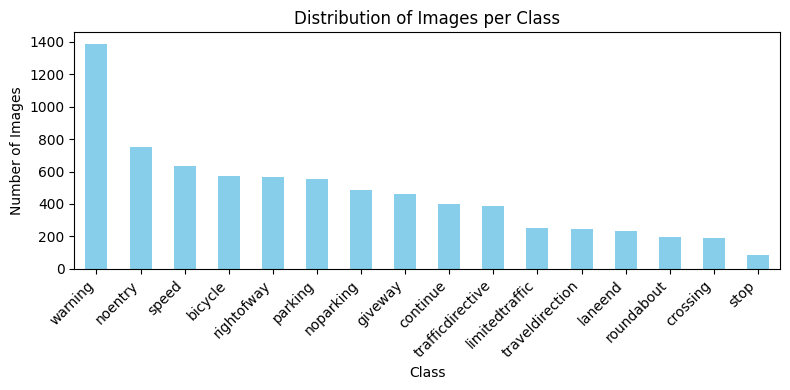

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file = '/content/drive/My Drive/Assignment2/type.csv'

# Load the data into a DataFrame
data = pd.read_csv(csv_file)

# Count the number of images per class
class_distribution = data['class'].value_counts()

plt.figure(figsize=(8, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observations:**
- The distribution of images per class is highly imbalanced.
- This imbalance could potentially affect the performance of a machine-learning model trained on this data.

### **1.4.2 Distribution of images per shape class**

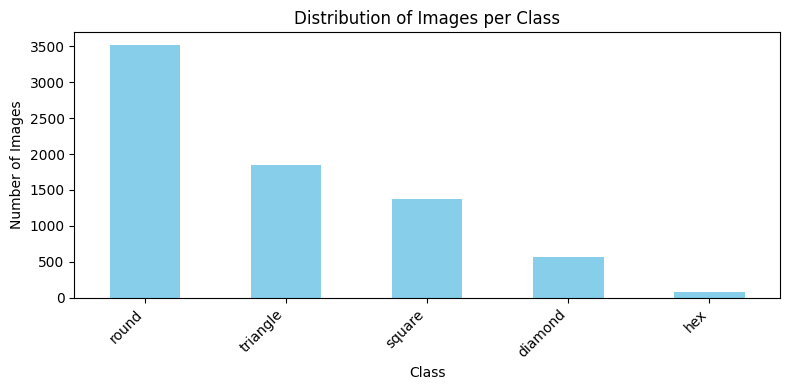

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file = '/content/drive/My Drive/Assignment2/shape.csv'

# Load the data into a DataFrame
data = pd.read_csv(csv_file)

# Count the number of images per class
class_distribution = data['class'].value_counts()

plt.figure(figsize=(8, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observations:**
- The distribution of images per class is imbalanced, but not as severe as the class distribution for type.
- This imbalance could potentially affect the performance of a machine-learning model trained on this data, but to a lesser extent than the type data.

# **1.5 Data Augmentation**

**Recognizing the imbalance in our data, we plan to explore whether supplementing the smaller classes with augmented data can enhance the accuracy of our model. In this section, we will establish new folders to house the augmented datasets derived from the original training data.**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Load the data
type_df = pd.read_csv('/content/drive/My Drive/Assignment2/type.csv')
shape_df = pd.read_csv('/content/drive/My Drive/Assignment2/shape.csv')

# Image augmentation setup for grayscale images
augmentation = ImageDataGenerator(
    rotation_range=15,     # random rotations between 0 to 15 degrees
    width_shift_range=0.1, # horizontal shifts up to 10% of image width
    height_shift_range=0.1,# vertical shifts up to 10% of image height
    shear_range=0.1,       # shear transformation intensity
    zoom_range=0.1,        # random zoom up to 10%
    horizontal_flip=False, # no flipping for symmetric traffic signs might not be sensible
    fill_mode='nearest'    # fill strategy for new pixels
)

# Function to perform augmentation
def augment_images(image_paths):
    augmented_images = []
    for img_path in image_paths:
        # Load image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img.reshape(img.shape + (1,))  # Add channel dimension (28, 28) -> (28, 28, 1)
        img = img.reshape((1,) + img.shape)  # reshape for generator (1, 28, 28, 1)

        # Generate augmented images
        i = 0
        for batch in augmentation.flow(img, batch_size=1):
            augmented_images.append(batch[0].reshape(28, 28))  # Remove channel dimension for consistency
            i += 1
            if i >= 5:  # Generate 5 augmented images per input image
                break

    return augmented_images

# Splitting and augmenting shape training data
shape_groups = shape_df.groupby('encoded_class')
X_shape_train = []

for label, group in shape_groups:
    X_train, _, y_train, _ = train_test_split(
        group['image_path'], group['encoded_class'], test_size=0.2, stratify=group['encoded_class'])

    # Augment training images
    augmented_images = augment_images(X_train.tolist())
    X_shape_train.extend(augmented_images)

# Convert list to numpy array for further processing if needed
X_shape_train = np.array(X_shape_train)


# Model development

## Base Model

In [32]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [33]:
INPUT_DIM = (28, 28, 1)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 5

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.15.0'

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 202245 (790.02 KB)
Trainable params: 202245 (790.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


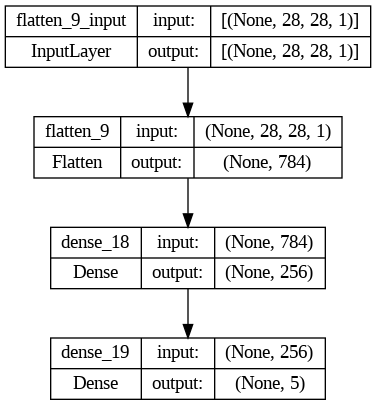

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_shape_train['encoded_class'] = X_shape_train['encoded_class'].astype('str')
X_shape_val['encoded_class'] = X_shape_val['encoded_class'].astype('str')

X_type_train['encoded_class'] = X_type_train['encoded_class'].astype('str')
X_type_val['encoded_class'] = X_type_val['encoded_class'].astype('str')

print("Shape of X_shape_train:", X_shape_train.shape)
print("Shape of X_shape_val:", X_shape_val.shape)
print("Shape of X_shape_test:", X_shape_test.shape)
print("\nShape of X_type_train:", X_type_train.shape)
print("Shape of X_type_val:", X_type_val.shape)
print("Shape of X_type_test:", X_type_test.shape)

Shape of X_shape_train: (2957, 2)
Shape of X_shape_val: (554, 2)
Shape of X_shape_test: (188, 2)

Shape of X_type_train: (2954, 2)
Shape of X_type_val: (553, 2)
Shape of X_type_test: (192, 2)


#Shape prediction

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Shape
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 20

train_generator = train_datagen.flow_from_dataframe(
        dataframe=X_shape_train,
        directory='./dataShape/train',
        x_col="image_path",
        y_col="encoded_class",
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=X_shape_val,
        directory='./dataShape/validation',
        x_col="image_path",
        y_col="encoded_class",
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical')

Found 2957 validated image filenames belonging to 5 classes.
Found 554 validated image filenames belonging to 5 classes.


In [ ]:
import tensorflow as tf

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


147/147 [==============================] - 2s 11ms/step - loss: 1.2410 - categorical_accuracy: 0.4692 - val_loss: 1.1758 - val_categorical_accuracy: 0.4796
Epoch 2/10
147/147 [==============================] - 2s 14ms/step - loss: 1.1487 - categorical_accuracy: 0.5111 - val_loss: 1.0991 - val_categorical_accuracy: 0.6037
Epoch 3/10
147/147 [==============================] - 2s 10ms/step - loss: 1.0757 - categorical_accuracy: 0.5785 - val_loss: 1.0384 - val_categorical_accuracy: 0.5370
Epoch 4/10
147/147 [==============================] - 1s 10ms/step - loss: 1.0085 - categorical_accuracy: 0.6299 - val_loss: 0.9813 - val_categorical_accuracy: 0.6500
Epoch 5/10
147/147 [==============================] - 1s 10ms/step - loss: 0.9509 - categorical_accuracy: 0.6755 - val_loss: 0.9209 - val_categorical_accuracy: 0.6500
Epoch 6/10
147/147 [==============================] - 1s 10ms/step - loss: 0.8981 - categorical_accuracy: 0.7024 - val_loss: 0.8706 - val_categorical_accuracy: 0.6852
Epoch 7/1

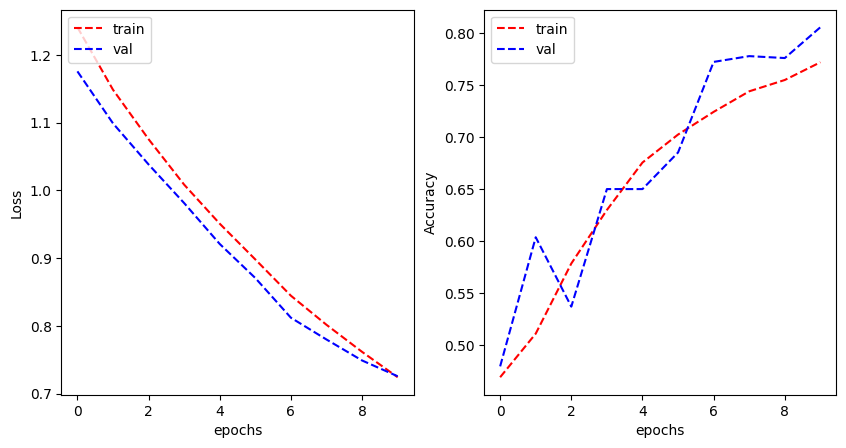

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

In [ ]:
label_names = {'Square' : 0, 'Round' : 1, 'Hex' : 2, 'Diamond' : 3, 'Tringle' : 4 }

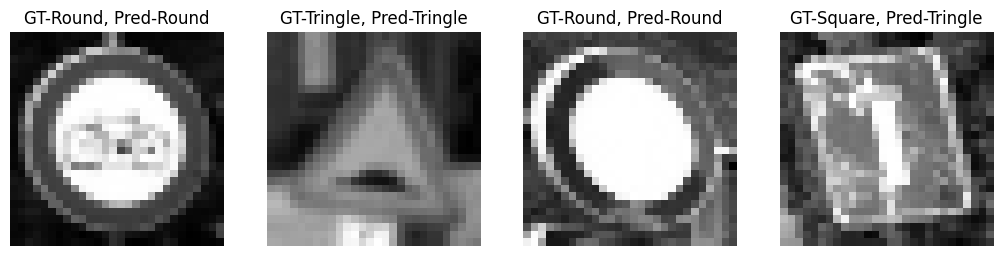

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16, 4))
batches = 0

for x, y in train_generator:
    batches += 1
    y_hat = model.predict(x, verbose=0)
    x = np.squeeze(x[0])

    if batches < 5:
        plt.subplot(1, 5, batches)
        plt.imshow(x, cmap='gray')
        plt.title(f"GT-{d_inv[np.argmax(y[0])]}, Pred-{d_inv[np.argmax(y_hat[0])]}")
        plt.axis('off')
    else:
        break

plt.show()


#Type prediction

In [ ]:

# Type
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 20

train_generator = train_datagen.flow_from_dataframe(
        dataframe=X_type_train,
        directory='./dataType/train',
        x_col="image_path",
        y_col="encoded_class",
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=X_type_val,
        directory='./dataType/validation',
        x_col="image_path",
        y_col="encoded_class",
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode='categorical')

Found 2954 validated image filenames belonging to 16 classes.
Found 553 validated image filenames belonging to 16 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(16, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               692352    
                                                                 
 dense_21 (Dense)            (None, 16)                2064      
                                                                 
Total params: 694736 (2.65 MB)
Trainable params: 694736 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

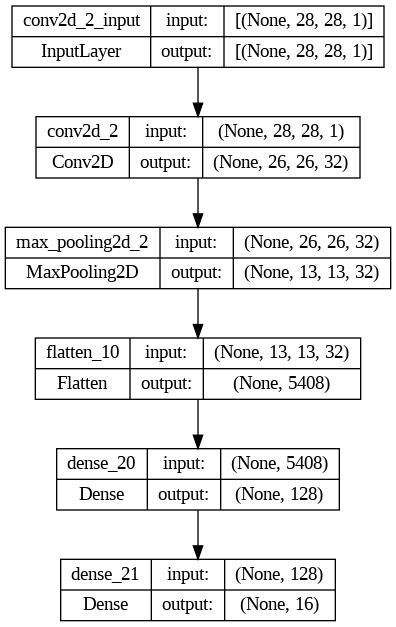

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
import tensorflow as tf

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


147/147 [==============================] - 5s 28ms/step - loss: 2.4526 - categorical_accuracy: 0.2495 - val_loss: 2.1379 - val_categorical_accuracy: 0.3074
Epoch 2/10
147/147 [==============================] - 3s 19ms/step - loss: 1.7290 - categorical_accuracy: 0.5392 - val_loss: 1.3679 - val_categorical_accuracy: 0.6370
Epoch 3/10
147/147 [==============================] - 2s 17ms/step - loss: 1.1390 - categorical_accuracy: 0.7042 - val_loss: 0.9714 - val_categorical_accuracy: 0.7315
Epoch 4/10
147/147 [==============================] - 2s 16ms/step - loss: 0.8413 - categorical_accuracy: 0.7682 - val_loss: 0.7923 - val_categorical_accuracy: 0.7926
Epoch 5/10
147/147 [==============================] - 4s 26ms/step - loss: 0.6885 - categorical_accuracy: 0.8132 - val_loss: 0.6447 - val_categorical_accuracy: 0.8148
Epoch 6/10
147/147 [==============================] - 2s 17ms/step - loss: 0.5618 - categorical_accuracy: 0.8487 - val_loss: 0.5295 - val_categorical_accuracy: 0.8426
Epoch 7/1

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_type_train,
    directory='./data/train',
    x_col='image_path',
    y_col='encoded_class',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=X_type_val,
    directory='./data/validation',
    x_col='image_path',
    y_col='encoded_class',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=20,
    class_mode='categorical'
)


Found 2954 validated image filenames belonging to 16 classes.
Found 553 validated image filenames belonging to 16 classes.


In [ ]:
import tensorflow as tf

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])


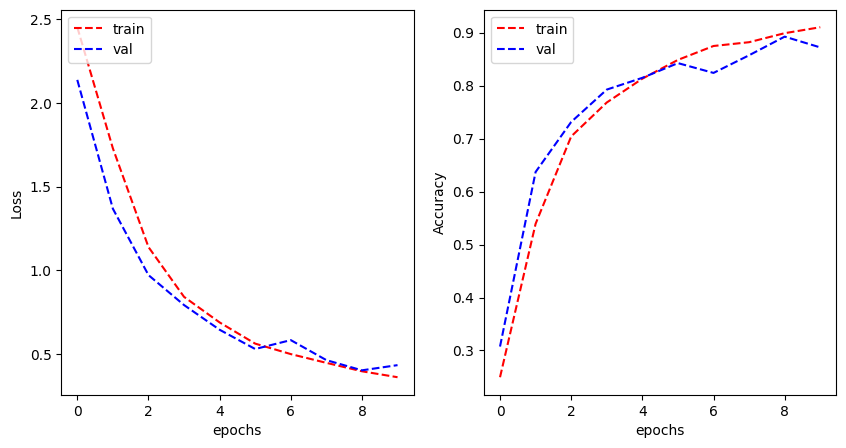

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

In [ ]:
label_names = {'Landeed' : 0, 'Continue' : 1, 'Crossing' : 2, 'Parking' : 3, 'Bicycle' : 4 ,'Trafficdirective' : 5, 'Traveldirection' : 6, 'Noentry' : 7, 'roundabout' : 8, 'speed' : 9,'noparking' : 10, 'limitedtraffic' : 11, 'Stop' : 12, 'Rightofway' : 13, 'Giveway' : 14, 'Warning' :15 }

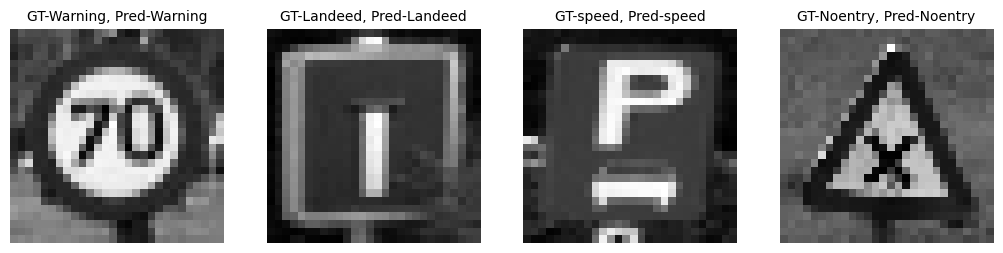

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16, 4))
batches = 0

for x, y in train_generator:
    batches += 1
    y_hat = model.predict(x, verbose=0)
    x = np.squeeze(x[0])

    if batches < 5:
        plt.subplot(1, 5, batches)
        plt.imshow(x, cmap='gray')
        plt.title(f"GT-{d_inv[np.argmax(y[0])]}, Pred-{d_inv[np.argmax(y_hat[0])]}", fontsize=10)
        plt.axis('off')
    else:
        break
plt.show()